##**Mobile Price Classification**

## Importing Dependencies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os, time

# Loading Data

In [2]:
df = pd.read_csv('/content/train.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

*There are 2000 instances and 20 Independent Features and 1 Dependent Feature ('Price Range').*

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

*Learning the dtypes of columns' and how many non-null values are there in those columns*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

*Looking at the following output it seems that there are no missing values so we can skip the Data Cleaning process.*

*Getting the statistical summary of dataset*

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Visualizing the correlations between numerical variables




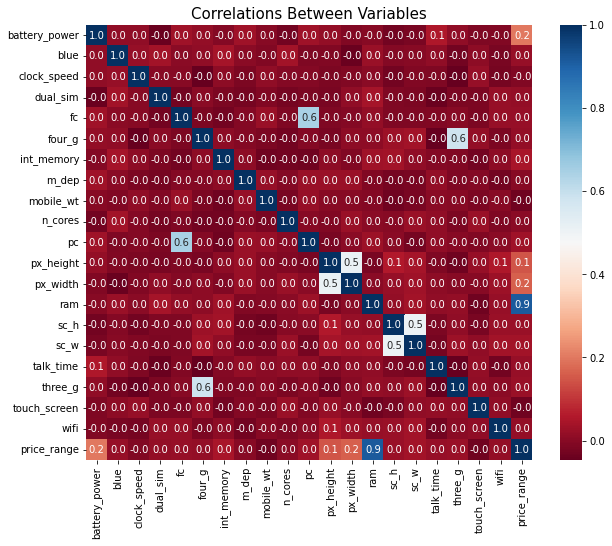

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show()

Observation from the heatmap:

*   Independent variable RAM is highly positively correlated to the dependent variable Price Range.
*   Variables screen height and width are positively correlated, similary front camera mega pixels and primary camera mega pixles are correlated and even 4g and 3g , pixel height and pixel width.





# Feature Selection

In [14]:
important_num_cols = list(df.corr()["price_range"][(df.corr()["price_range"]>0.50) | (df.corr()["price_range"]<-0.50)].index)
cat_cols = ["blue", "dual_sim","four_g","three_g","touch_screen","wifi","n_cores"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [15]:
df

,ram,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores
0,2549,1,0,0,0,0,0,1,2
1,2631,2,1,1,1,1,1,0,3
2,2603,2,1,1,1,1,1,0,5
3,2769,2,1,0,0,1,0,0,6
4,1411,1,1,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...
1995,668,0,1,1,1,1,1,0,6
1996,2032,2,1,1,0,1,1,1,4
1997,3057,3,0,1,1,1,1,0,8
1998,869,0,0,0,1,1,1,1,5


In [16]:
important_num_cols

['ram', 'price_range']

# Checking for the missing values



In [17]:
print("Missing Values by Column")
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
ram             0
price_range     0
blue            0
dual_sim        0
four_g          0
three_g         0
touch_screen    0
wifi            0
n_cores         0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [18]:
#Checking for the duplicated values
df.duplicated().sum()

0

# Data Visualization

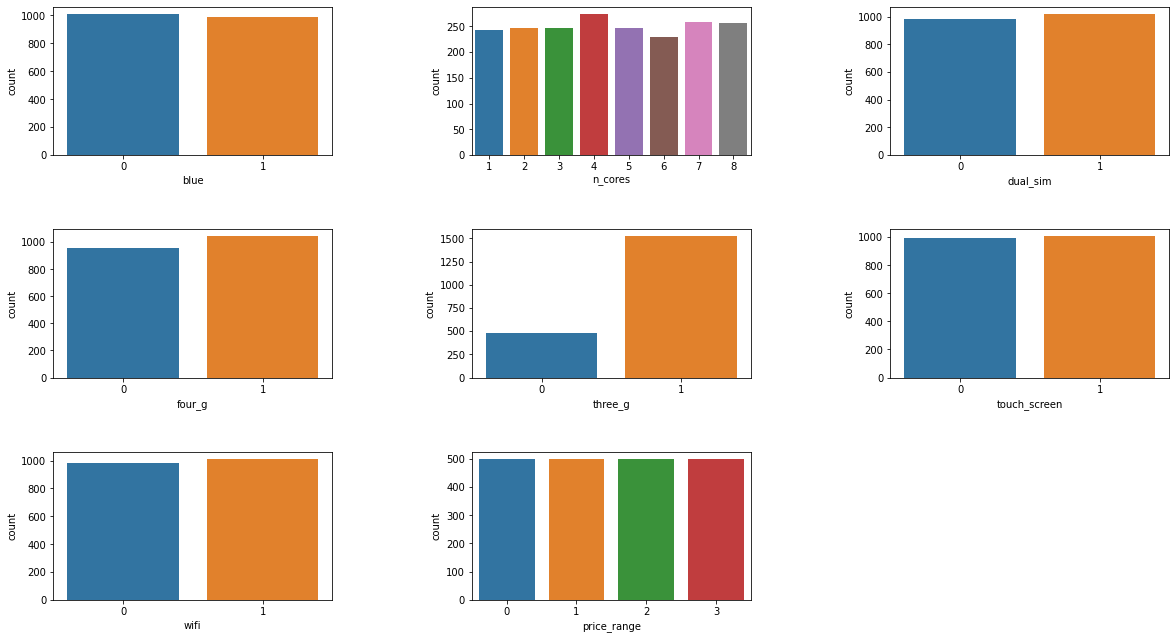

In [20]:
plt.figure(1 , figsize = (20 , 15))

n = 0 
for x in descreteFeat:
    n += 1
    plt.subplot(4 , 3 , n)
    sns.countplot(x = x , data = df)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    
plt.show()


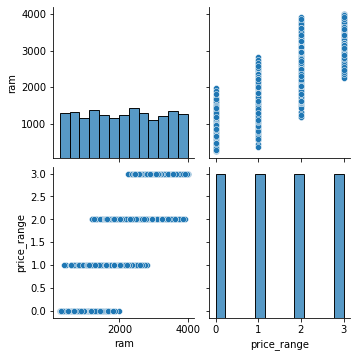

In [22]:
sns.pairplot(df[important_num_cols])

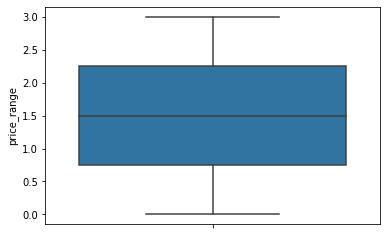

In [60]:
sns.boxplot(y="price_range", data = df)

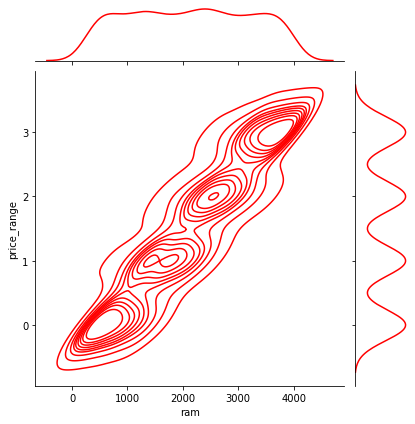

In [62]:
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde');

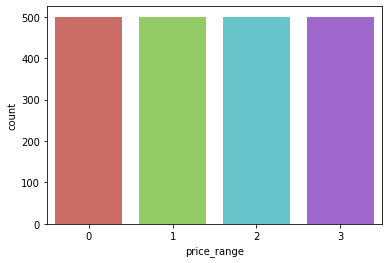

In [70]:
sns.countplot(x = 'price_range',data=df,palette = 'hls')
plt.show()

# Data Preprocessing


In [25]:
#Splitting the data into X and y chunks


X = df.drop("price_range", axis=1)
y = df["price_range"]

# Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train.shape

(1500, 8)

In [30]:
X_test.shape

(500, 8)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)
y_pred = loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.728

# kNN

In [36]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.732

# #Model tuning

In [38]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv_model = GridSearchCV(knn,knn_params, cv=10).fit(X_train,y_train)
print("Best Score: ",knn_cv_model.best_score_)
print("Best Params: ",knn_cv_model.best_params_)

Best Score:  0.7566666666666667
Best Params:  {'n_neighbors': 31}


#SVM

In [40]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.762

# GaussianNB

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[113  19   0   0]
 [ 19  80  19   0]
 [  1  14  81  24]
 [  0   0  22 108]]
accuracy score =  0.764


# Random Forests

In [41]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
rf_model
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.71

# Linear Regression (Creating & Training)



In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
lm.score(X_test,y_test)

0.8441939044496907

In [47]:
y_pred=lm.predict(X_test)

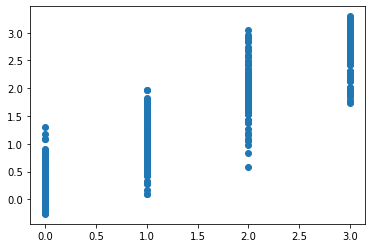

In [49]:
plt.scatter(y_test,y_pred)

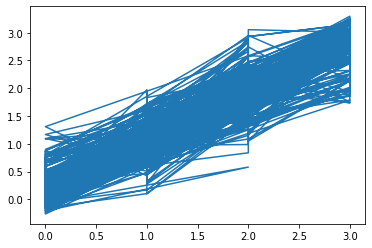

In [50]:
plt.plot(y_test,y_pred)

# DEEP LEARNING - KERAS

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
from tensorflow import keras
from keras.models import model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop ,SGD,Adam,get,Adadelta,Adagrad
from sklearn.model_selection import train_test_split

In [52]:
model=keras.Sequential()
model.add(Dense(200,activation='relu',input_shape=(20,)))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4200      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 150)               15150     
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 80)                8080      
                                                                 
 dense_6 (Dense)             (None, 40)                3

In [53]:
hist = model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
#train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=200, verbose=1)